In [1]:
import os
import random
import numpy as np
import tensorflow as tf
import cv2
from tensorflow.keras.preprocessing.image import load_img, array_to_img, img_to_array
#from tensorflow.keras import backend as K
from PIL import Image

In [2]:
image_1 = np.asarray(load_img('../input/frames-imgmsk-me/frames_masks_me/frames/108.jpg',target_size = (256,256,3)), dtype = 'uint8')
mask_1 = img_to_array(load_img('../input/frames-imgmsk-me/frames_masks_me/frame_masks/108.jpeg',
                             target_size = (256,256,1), color_mode="grayscale" )).reshape((256,256)).astype('uint8')
image_2 = np.asarray(load_img('../input/frames-imgmsk-me/frames_masks_me/frames/115.jpg',target_size = (256,256,3)), dtype = 'uint8')
mask_2 = img_to_array(load_img('../input/frames-imgmsk-me/frames_masks_me/frame_masks/115.jpeg',
                             target_size = (256,256,1), color_mode="grayscale" )).reshape((256,256)).astype('uint8')

In [3]:
_, binary_mask_1 = cv2.threshold(mask_1, 127, 255, cv2.THRESH_BINARY)
_, binary_mask_2 = cv2.threshold(mask_2, 127, 255, cv2.THRESH_BINARY)

In [4]:
new_arr_1 = np.where(binary_mask_1.reshape((256,256,1))>0,image_1,255)
new_arr_2 = np.where(binary_mask_2.reshape((256,256,1))>0,image_2,255)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

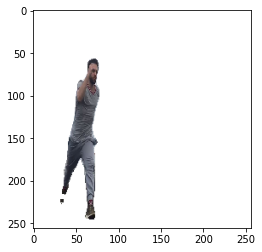

In [6]:
plt.imshow(array_to_img(new_arr_1))

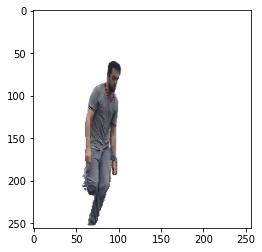

In [7]:
plt.imshow(array_to_img(new_arr_2))

In [8]:
new_arr_3 = np.where(binary_mask_2.reshape((256,256,1))>0,image_2,image_1)

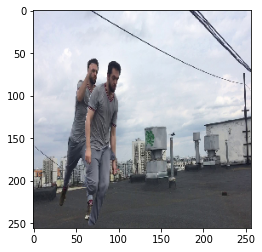

In [9]:
plt.imshow(array_to_img(new_arr_3))

In [10]:
video = cv2.VideoWriter('./collag_video.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 30, (256, 256))

In [11]:
main_arr = np.asarray(load_img('../input/frames-imgmsk-me/frames_masks_me/frames/0.jpg',target_size = (256,256,3)), dtype = 'uint8')
os.mkdir('./collages')
for index in range(len(os.listdir('../input/frames-imgmsk-me/frames_masks_me/frames'))-1):
    image = np.asarray(load_img('../input/frames-imgmsk-me/frames_masks_me/frames/{}.jpg'.format(str(index)),target_size = (256,256,3)), dtype = 'uint8')
    mask = img_to_array(load_img('../input/frames-imgmsk-me/frames_masks_me/frame_masks/{}.jpeg'.format(str(index)),
                                 target_size = (256,256,1), color_mode="grayscale" )).reshape((256,256)).astype('uint8')
    _, binary_mask = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)
    main_arr = np.where(binary_mask.reshape((256,256,1))>0,image,main_arr)
    tf.keras.utils.save_img('./collages/{}.jpg'.format(str(index)),main_arr)
    video.write(main_arr)

In [12]:
video.release()


In [13]:
cort_imgs = (Image.open('./collages/{}.jpg'.format(str(index)))
             for index in range(0,len(os.listdir('./collages'))))

In [14]:
img = next(cort_imgs)
img.save(fp='./collage_gif.gif', format='GIF', append_images=cort_imgs,
         save_all=True, duration=40, loop=0)